# Clusteranalyse

In diesem Abschnitt wird der K-means Algorithmus zur Clusteranalyse, ein Beispiel für unsupervised learning, behandelt.
Als Beispiel dienen Ergebnisse in den Mathematik- und Programmierklausuren des ersten Semsters. Das Ziel der Analyse ist es, Kriterien herauszufinden, die bei der Entscheidung helfen, ob ein Student zur "gefährdeten" Gruppe gehört. Dazu werden die Studenten jeweils einer repräsentativen Gruppe (eben einem Cluster) zugeordnet. Jeder Cluster wird durch einen fiktiven zentralen Punkt repräsentiert, dessen Koordinaten sich je Cluster aus den Mittelwerten der Koordinaten der zugehörigen Elemente berechnen lassen.

Der K-means Algorithmus funktioniert so, dass zunächst die Zahl der Cluster vorgegeben wird. Zunächst werden die Cluster zufällig platziert. Dann wird in jeder Iteration für jeden Datenpunkt bestimmt, zu welchem Cluster er gehört. Dazu wird jeder Punkt dem Cluster zugeordnet, bei dem der Abstand zwischen Punkt und Clusterzentrum am kleinsten ist. In der Regel wird hier der euklidische Abstand verwendet. Sind alle Punkte zugeordnet, wird für jedem Cluster das neue Zentrum berechnet und die nächste Iteration ausgeführt.

In [4]:
import pandas as pd
%matplotlib inline
import matplotlib 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
filepath = 'noten.csv'

Die Daten liegen als .csv Datei vor, die erste Spalte enthält die Noten in Programmierung, die zweite die in Mathematik.


In [6]:
df = pd.read_csv(filepath, delimiter=';',  encoding='latin-1')
df = df.apply(lambda x: x.str.replace(",",".")).astype(float)
df.head()

,Note Prog. I,Note Mathe
0,1.0,2.8
1,1.0,2.9
2,1.1,4.7
3,1.2,1.9
4,1.2,2.0


Hier werden die Daten eines Jahrgangs untersucht, es sind 35 Datensätze.


In [18]:
df.describe()

,Note Prog. I,Note Mathe
count,35.000000,35.000000
mean,2.882857,3.525714
std,1.308903,1.122849
min,1.000000,1.000000
25%,1.400000,2.800000
50%,2.900000,4.000000
75%,4.000000,4.500000
max,4.600000,5.000000


Um die Daten besser handhaben zu können, werden die x- und y- Werte getrennt.
*map* wendet die als ersten Parameter übergebene Funktion auf jedes Element der als zweiter Parameter übergebenen Collection an.

In [10]:
noten = (df.values, None)
val, dummy = noten
x = map(lambda x: x[0],val)
y = map(lambda x: x[1],val)

Zunächst eine Übersicht über die Daten.
Grundsätzlich ist es sinnvoll, als ersten Schritt einer Analyse eine geeignete grafische Übersicht der Daten zu erzeugen.

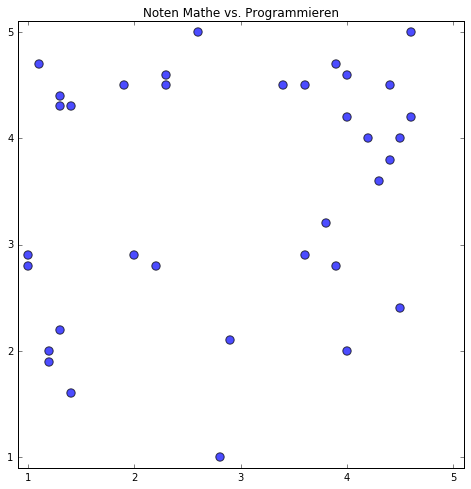

In [11]:
data = plt.figure(1,figsize=(8,8))
axes = plt.gca()
axes.set_xlim([0.9,5.1])
axes.set_ylim([0.9,5.1])
plt.scatter(x,y,s=70,alpha=0.7)
plt.title("Noten Mathe vs. Programmieren")
plt.show()

Man kann natürlich auch hier eine lineare Regression durchführen und hier (bei zwei Parametern) eine Ausgleichsgrade berechnen.


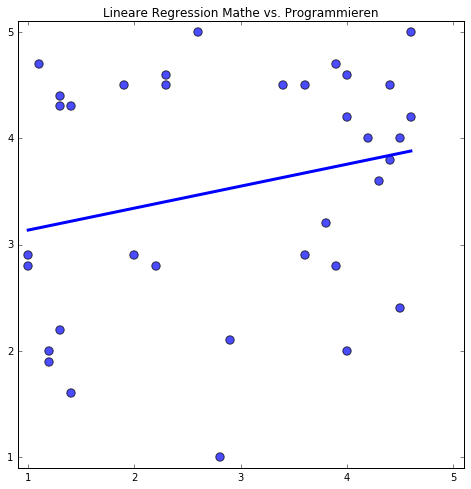

In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np 
lm = LinearRegression()
xx = np.array(x).reshape(35,1)
yy = np.array(y).reshape(35,1)
lm.fit(xx,yy)

# print intercept and coefficients
#print lm.intercept_
#print lm.coef_

data = plt.figure(1,figsize=(8,8))
axes = plt.gca()
axes.set_xlim([0.9,5.1])
axes.set_ylim([0.9,5.1])
plt.scatter(x,y,s=70,alpha=0.7)
plt.title("Lineare Regression Mathe vs. Programmieren")
plt.plot(x,lm.predict(xx),color='blue',
         linewidth=3)
plt.show()

Die Aussage ist allerdings begrenzt ... Man kann aber hier schon gut erkennen, dass es mehrere Gruppen von Studenten gibt. Also machen wir eine Clusteranalyse. Hier verwenden wir die Funktionen von scikit-learn, einer freien machine-learning Library für python.

In [13]:
import matplotlib.cm as cm

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler


K means bestimmt die Zentren von k Clustern so, dass die zugehörigen Punkte einen möglichst geringen Abstand vom jeweiligen Zentrum haben,das heisst, das Zentrum entspricht dem Mittelwert der zugehörigen Punkte (daher means)
Ein Punkt wird dem Cluster zugeordnet, dessen Zentrum er am nächsten liegt.
Eine Visualisierung des Ablaufs gibt's hier: http://www.naftaliharris.com/blog/visualizing-k-means-clustering/

Aus der Visualisierung erkennen wir, dass wir mindestens 4 Cluster haben.

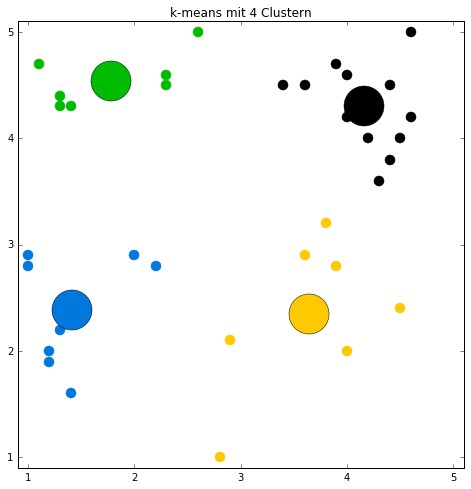

In [17]:
cluster_count = 4
km = cluster.KMeans(cluster_count)
pred=km.fit_predict(val,y)

fig = plt.figure(1,figsize=(8,8))
axes = plt.gca()
axes.set_xlim([0.9,5.1])
axes.set_ylim([0.9,5.1])
for k in range(cluster_count):
    my_members = km.labels_ == k
    xp = np.array(x)[my_members]
    yp = np.array(y)[my_members]
    color = cm.spectral(float(k) / cluster_count, 1)
    plt.plot(xp, yp, 'o', marker='.', c=color,markersize=20)
    cluster_center = km.cluster_centers_[k]
    plt.plot(cluster_center[0], cluster_center[1], 'o',
             markerfacecolor=color, markeredgecolor='k', markersize=40)
    plt.title("k-means mit 4 Clustern")


plt.show()

Man sieht, dass die Daten mit 4 Clustern recht gut beschrieben werden, durch Ändern des Parameters cluster_count kann die Anzahl geändert werden. Man kann erkennen, dass es einen Cluster von Studenten gibt, die in beiden Fächern Probleme haben, diese Gruppe ist sogar recht gross. Es gibt auch Studenten, die in beiden Fächern gut sind.